In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
# list of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'heart.csv'   #change this to the path of the csv file

# attempt to read the csv files with different encoding:
for encoding in encodings:
   try:
      df = pd.read_csv(file_path, encoding=encoding)
      print(f"File successfully read with encoding: {encoding}") 
      break        #Stop the loop if successful
   except UnicodeDecodeError:
      print(f"Failed to read with encoding: {encoding}") 
      continue    #Try the next encoding

#If the Loop completes without success, df will not be defined 
if 'df' in locals():
   print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")

File successfully read with encoding: utf-8
CSV file has been successfully loaded.


In [3]:
df.info

<bound method DataFrame.info of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False

In [4]:
df.shape

(920, 16)

In [5]:
# Displaying summary statistics of the dataset
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
### EDA ###

In [7]:
# CHECKING FOR MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [8]:
# checking the percentage of missing values

(df.isna().sum()/len(df) *100).round(2).sort_values(ascending=False)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

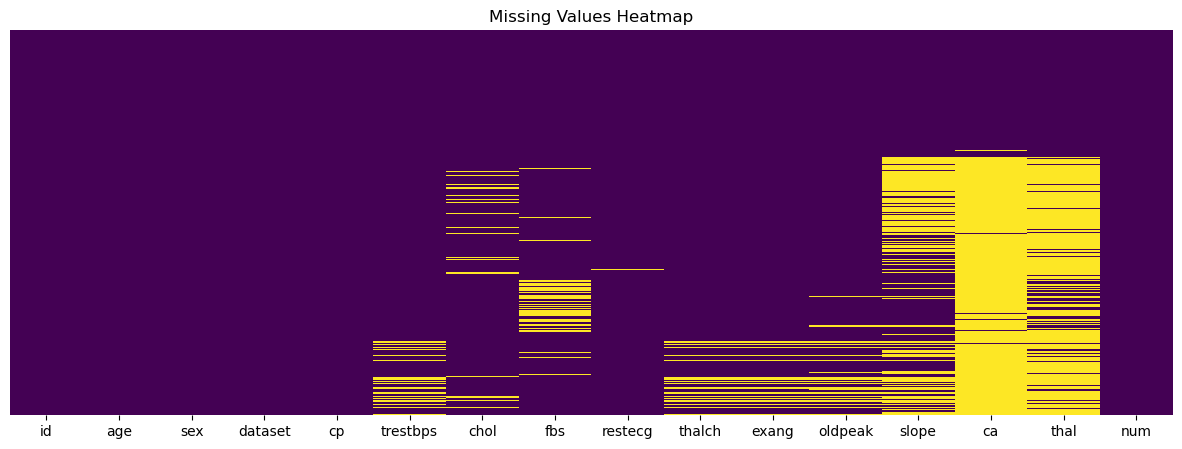

In [9]:
# printing the heatmap of the missing values

# setting the figure size
plt.figure(figsize=(15 , 5))
# plotting the heatmap
sns.heatmap(df.isna(), cbar=False , yticklabels=False, cmap='viridis')
# giving title
plt.title('Missing Values Heatmap')
# showing the plot
plt.show()

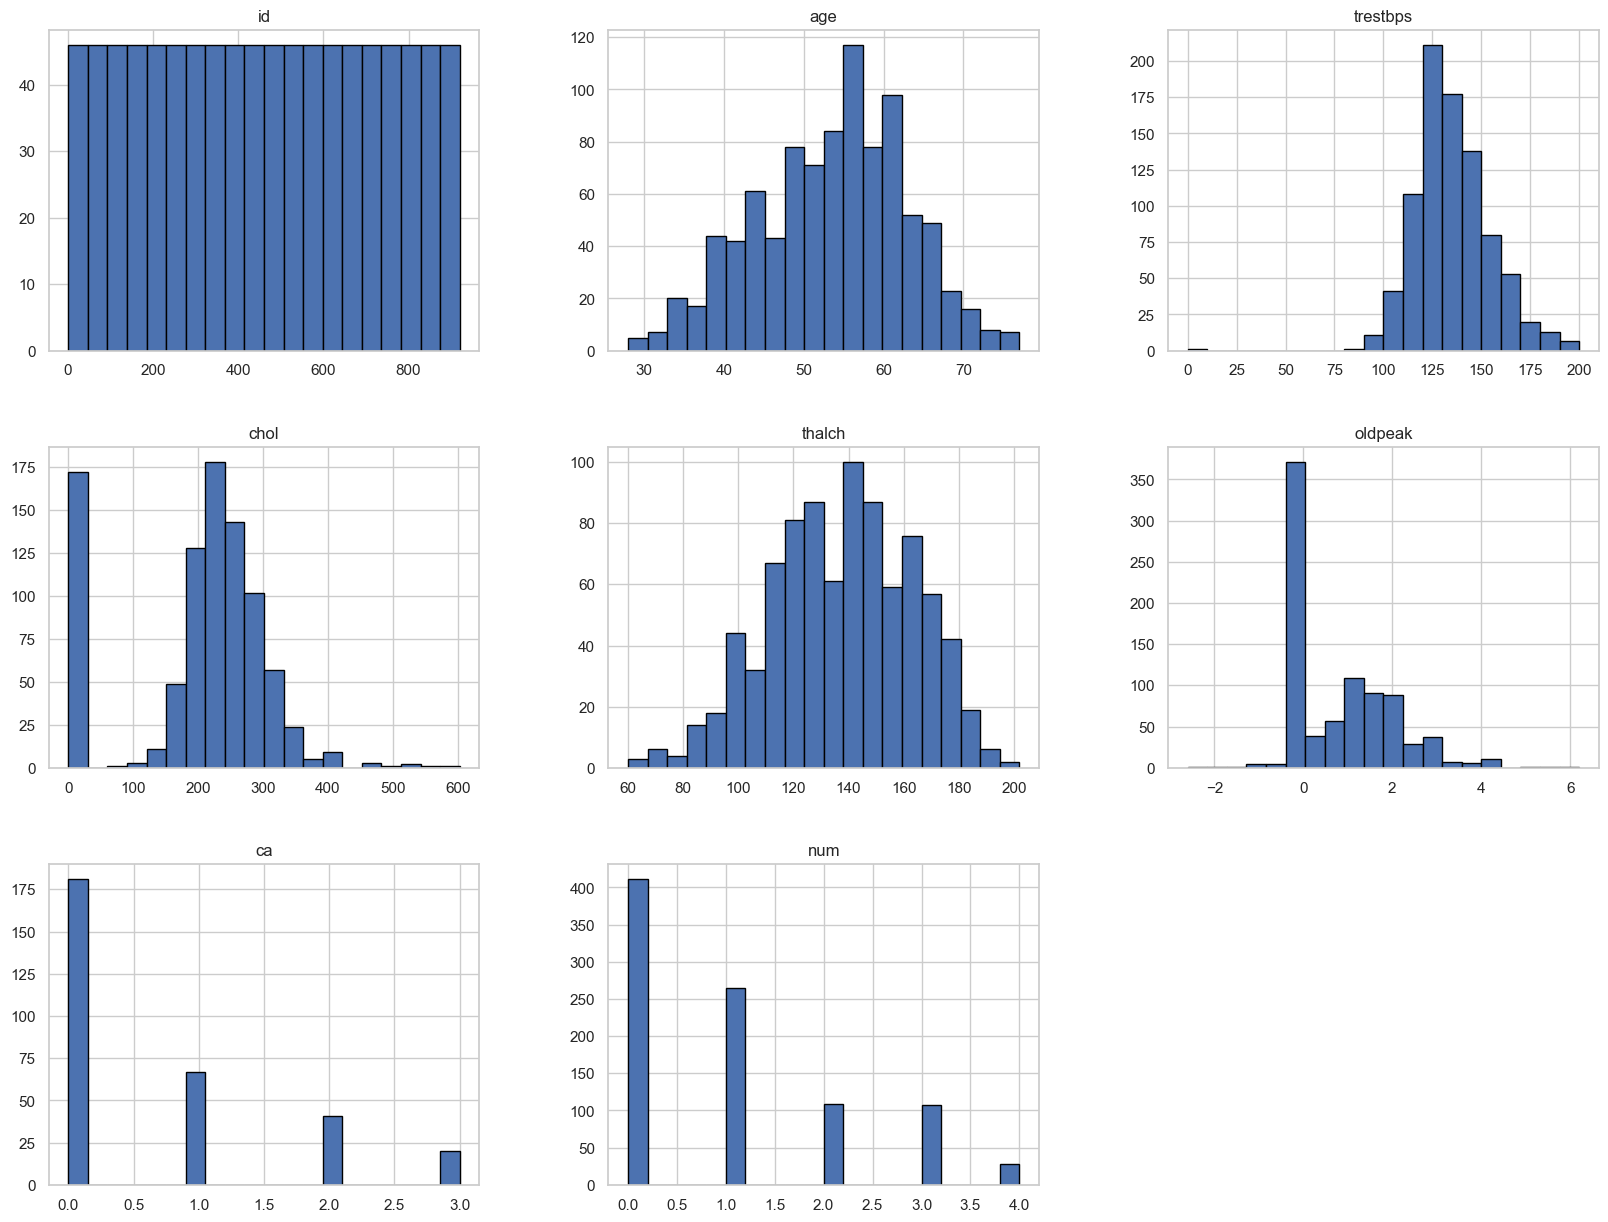

In [10]:
# VISUALIZING THE DISTRIBUTION OF FEATURES

import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

import matplotlib.pyplot as plt

# Visualizing the distribution of numerical features
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.show()

In [9]:
# Exploring age column #

df.age.unique()

array([63, 67, 37, 41, 56, 62, 57, 53, 44, 52, 48, 54, 49, 64, 58, 60, 50,
       66, 43, 40, 69, 59, 42, 55, 61, 65, 71, 51, 46, 45, 39, 68, 47, 34,
       35, 29, 70, 77, 38, 74, 76, 28, 30, 31, 32, 33, 36, 72, 73, 75],
      dtype=int64)

In [10]:
# checking the statistics of age

df.age.describe() 

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [11]:
## Distribution of age column ##

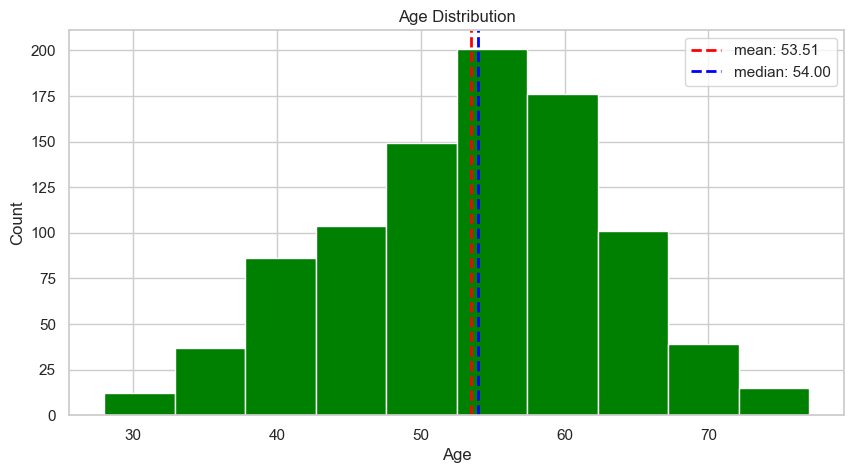

In [12]:
# draw a histogram to see the distribution of age

mean_age = df['age'].mean()
median_age = df['age'].median()

df.age.plot(kind='hist' ,color='green', figsize=(10, 5))
mean_line = plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2)
median_line = plt.axvline(df['age'].median(), color='blue', linestyle='dashed', linewidth=2)
# Adding legend
plt.legend(handles=[mean_line, median_line], labels=[f'mean: {mean_age:.2f}', f'median: {median_age:.2f}'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
## exploring the sex based distribution of age column ##

In [14]:
# checking unique values in sex column
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
# checking value count in sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [16]:
# percentage of male in our dataset

male_percentage = df['sex'].value_counts()[0] / df.shape[0] * 100

print(f'Male percentage in our data {male_percentage:.2f}%')

Male percentage in our data 78.91%


C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1981172921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_percentage = df['sex'].value_counts()[0] / df.shape[0] * 100


In [17]:
# percentage of feamle in our dataset
feamle_percentage = df[df['sex']=='Female']['sex'].count() / len(df)*100

print(f'Feamle percentage in our data {feamle_percentage:.2f}%')

Feamle percentage in our data 21.09%


In [18]:
## Percenatge of male and feamle in dataset ##

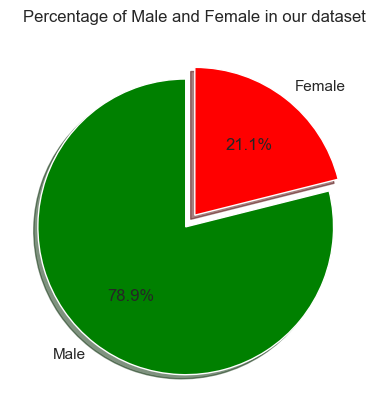

In [19]:
# drawing pie chart


labels = ['Male', 'Female']
sizes = [male_percentage, feamle_percentage]
colors = ['green', 'red']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Male and Female in our dataset')

plt.show()

In [20]:
## Age distribution by sex ##

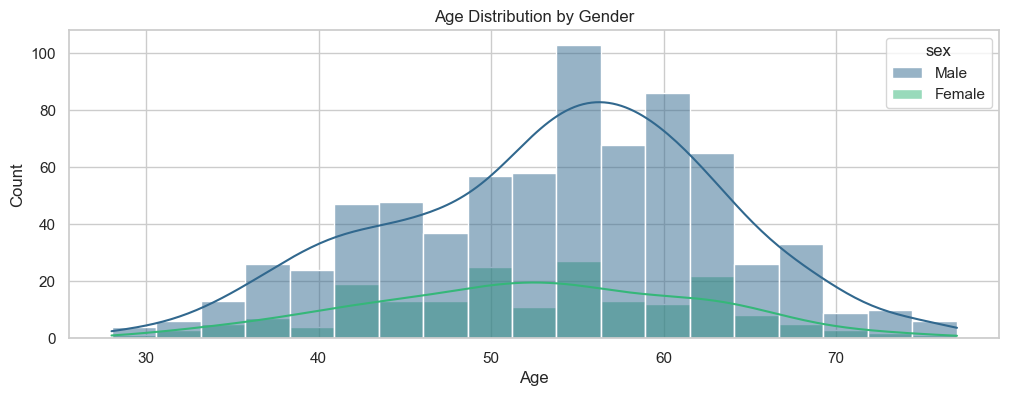

In [21]:
# Combine one-hot encoded columns back into a single 'sex' column
if 'sex_female' in df.columns and 'sex_male' in df.columns:
    df['sex'] = df.apply(lambda row: 'Female' if row['sex_female'] == 1 else 'Male', axis=1)

# Plotting the histogram of age with respect to sex
if 'age' in df.columns and 'sex' in df.columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(x='age', hue='sex', data=df, kde=True, palette='viridis')
    plt.title('Age Distribution by Gender')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
else:
    print("The required columns 'age' and 'sex' do not exist in the dataset.")

In [22]:
import plotly.express as px

# plotting histogram for each sex using plotly for better understanding
fig = px.histogram(data_frame=df , x='age' , color='sex', facet_col='sex')
# adding title
fig.update_layout(title_text='Age Distribution by Gender ')
fig.show(renderer='iframe_connected')

In [23]:
# lets grouo by sex with age to get value counts
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [24]:
## Dealing with dataset column ## 

In [25]:
df.columns # checking the exact name of the columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [26]:
# getting unique values of dataset column

df['dataset'].unique() 

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [27]:
# checking the contribution of each dataset in our dataframe

df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [28]:
##  Checking the gender wise contribution of each dataset  ##

In [29]:
# checking the gender wise contribution of each dataset in our datatframe

pd.crosstab(df['sex'], df['dataset'])

dataset,Cleveland,Hungary,Switzerland,VA Long Beach
sex,,,,
Female,97,81,10,6
Male,207,212,113,194


<Axes: xlabel='dataset', ylabel='count'>

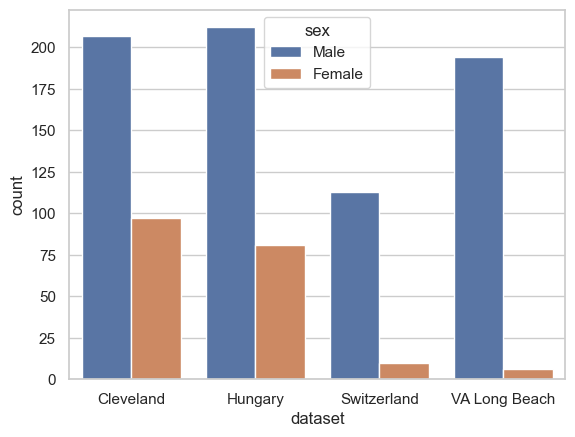

In [30]:
# visualizing the gender wise contribution of each dataset
sns.countplot(x='dataset', hue='sex', data=df)

In [31]:
# grouping by sex , dataset 
df.groupby(['sex' , 'dataset']).size()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Cleveland        207
        Hungary          212
        Switzerland      113
        VA Long Beach    194
dtype: int64

In [32]:
## Age distribution by dataset

In [33]:
# ploting age distribution by dataset
fig = px.histogram(data_frame=df, x='age'  , facet_col='dataset')	
# adding title
fig.update_layout(title_text='Age Distribution by Dataset')
fig.show(renderer='iframe_connected')

In [34]:
# the patient with age less than 30 belongs to which location

df[df['age']<30][['sex','dataset']].value_counts()

sex   dataset  
Male  Cleveland    2
      Hungary      2
Name: count, dtype: int64

In [35]:
# the patient with age greater than 74 belongs to which location 

df[df['age']>74][['sex','dataset']].value_counts()

sex     dataset      
Male    VA Long Beach    5
Female  Cleveland        1
Male    Cleveland        1
Name: count, dtype: int64

In [36]:
# The mean, median and mode of age column grouped by dataset column


df.groupby('dataset')['age'].agg(['mean', 'median' , pd.Series.mode]).round(2)

,mean,median,mode
dataset,,,
Cleveland,54.35,55.5,58
Hungary,47.89,49.0,54
Switzerland,55.32,56.0,61
VA Long Beach,59.35,60.0,"[62, 63]"


In [37]:
## Lets explore cp (Chest pain type) column

In [38]:
# getting unique values of cp column

df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [39]:
# getting value count of cp column

df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [40]:
# Chest pain type grouped by sex

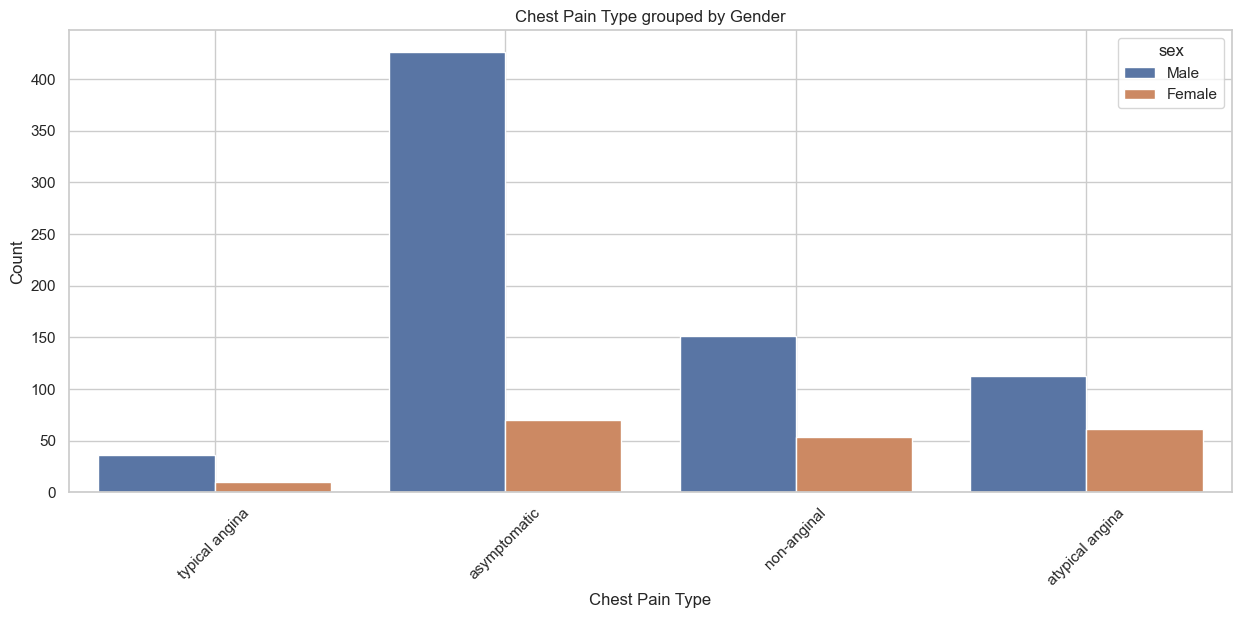

In [41]:
# visualizing cp column grouped by sex 

# defining figure size
plt.figure(figsize=(15,6))
# plotting countplot
sns.countplot(x='cp', hue='sex',data=df)

# adding title
plt.title('Chest Pain Type grouped by Gender')
# adding x and y label
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
# rotating x label
plt.xticks(rotation=45)
# adding grid
plt.grid('minor')
plt.show()

In [42]:
# grouping the cp column and sex column


pd.crosstab(df['cp'], df['sex'])

sex,Female,Male
cp,,
asymptomatic,70,426
atypical angina,61,113
non-anginal,53,151
typical angina,10,36


In [43]:
## Age distribution by cp

In [44]:
# plot of age column grouped by cp & sex column
fig = px.histogram(data_frame=df, x='age'  ,color='sex', facet_col='cp', )
# adding title
fig.update_layout(title_text='Age Distribution by Chest Pain Type')
fig.show(renderer='iframe_connected')

In [45]:
# grouping by dataset and cp
pd.DataFrame(df.groupby(['dataset'])['cp'].value_counts())

count
dataset       cp                    
Cleveland     asymptomatic       144
              non-anginal         86
              atypical angina     51
              typical angina      23
Hungary       asymptomatic       123
              atypical angina    105
              non-anginal         54
              typical angina      11
Switzerland   asymptomatic        98
              non-anginal         17
              atypical angina      4
              typical angina       4
VA Long Beach asymptomatic       131
              non-anginal         47
              atypical angina     14
              typical angina       8

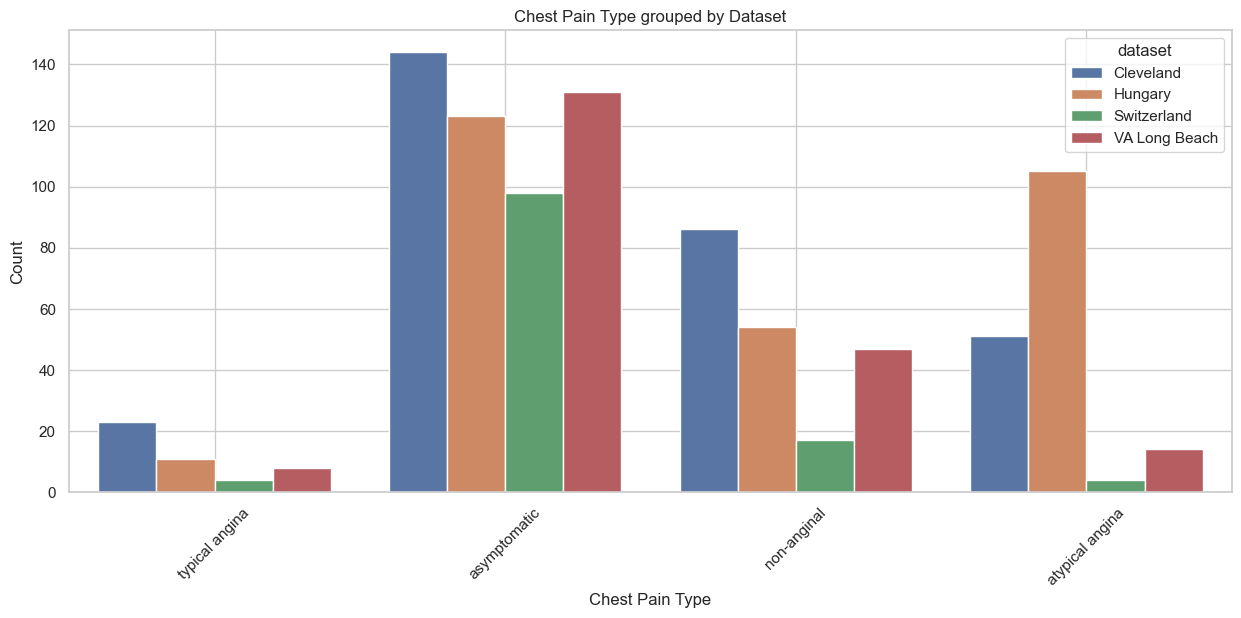

In [46]:
# visualizing cp column grouped by dataset 

# defining figure size
plt.figure(figsize=(15,6))
# plotting countplot
sns.countplot(x='cp', hue='dataset',data=df)

# adding title
plt.title('Chest Pain Type grouped by Dataset')
# adding x and y label
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
# rotating x label
plt.xticks(rotation=45)
# adding grid
plt.grid('minor')
plt.show()


In [47]:
### Visualizing Categorical Features ###

C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1245521773.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




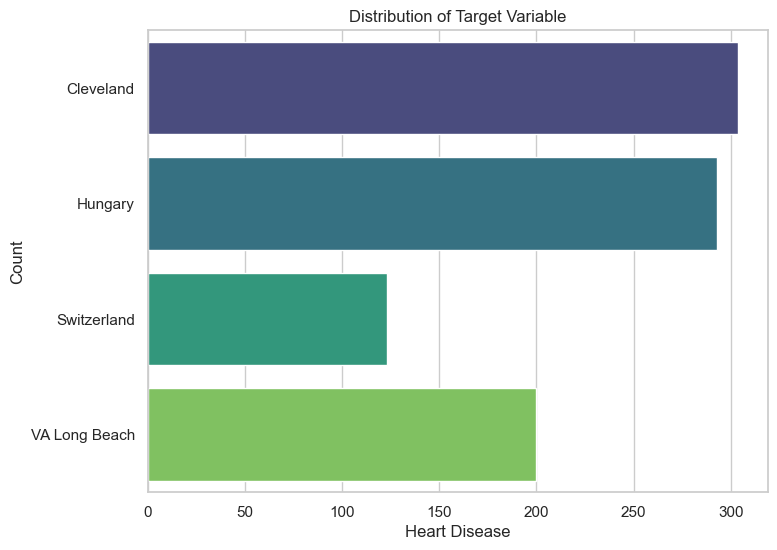

C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1245521773.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1245521773.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1245521773.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_45808\1245521773.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

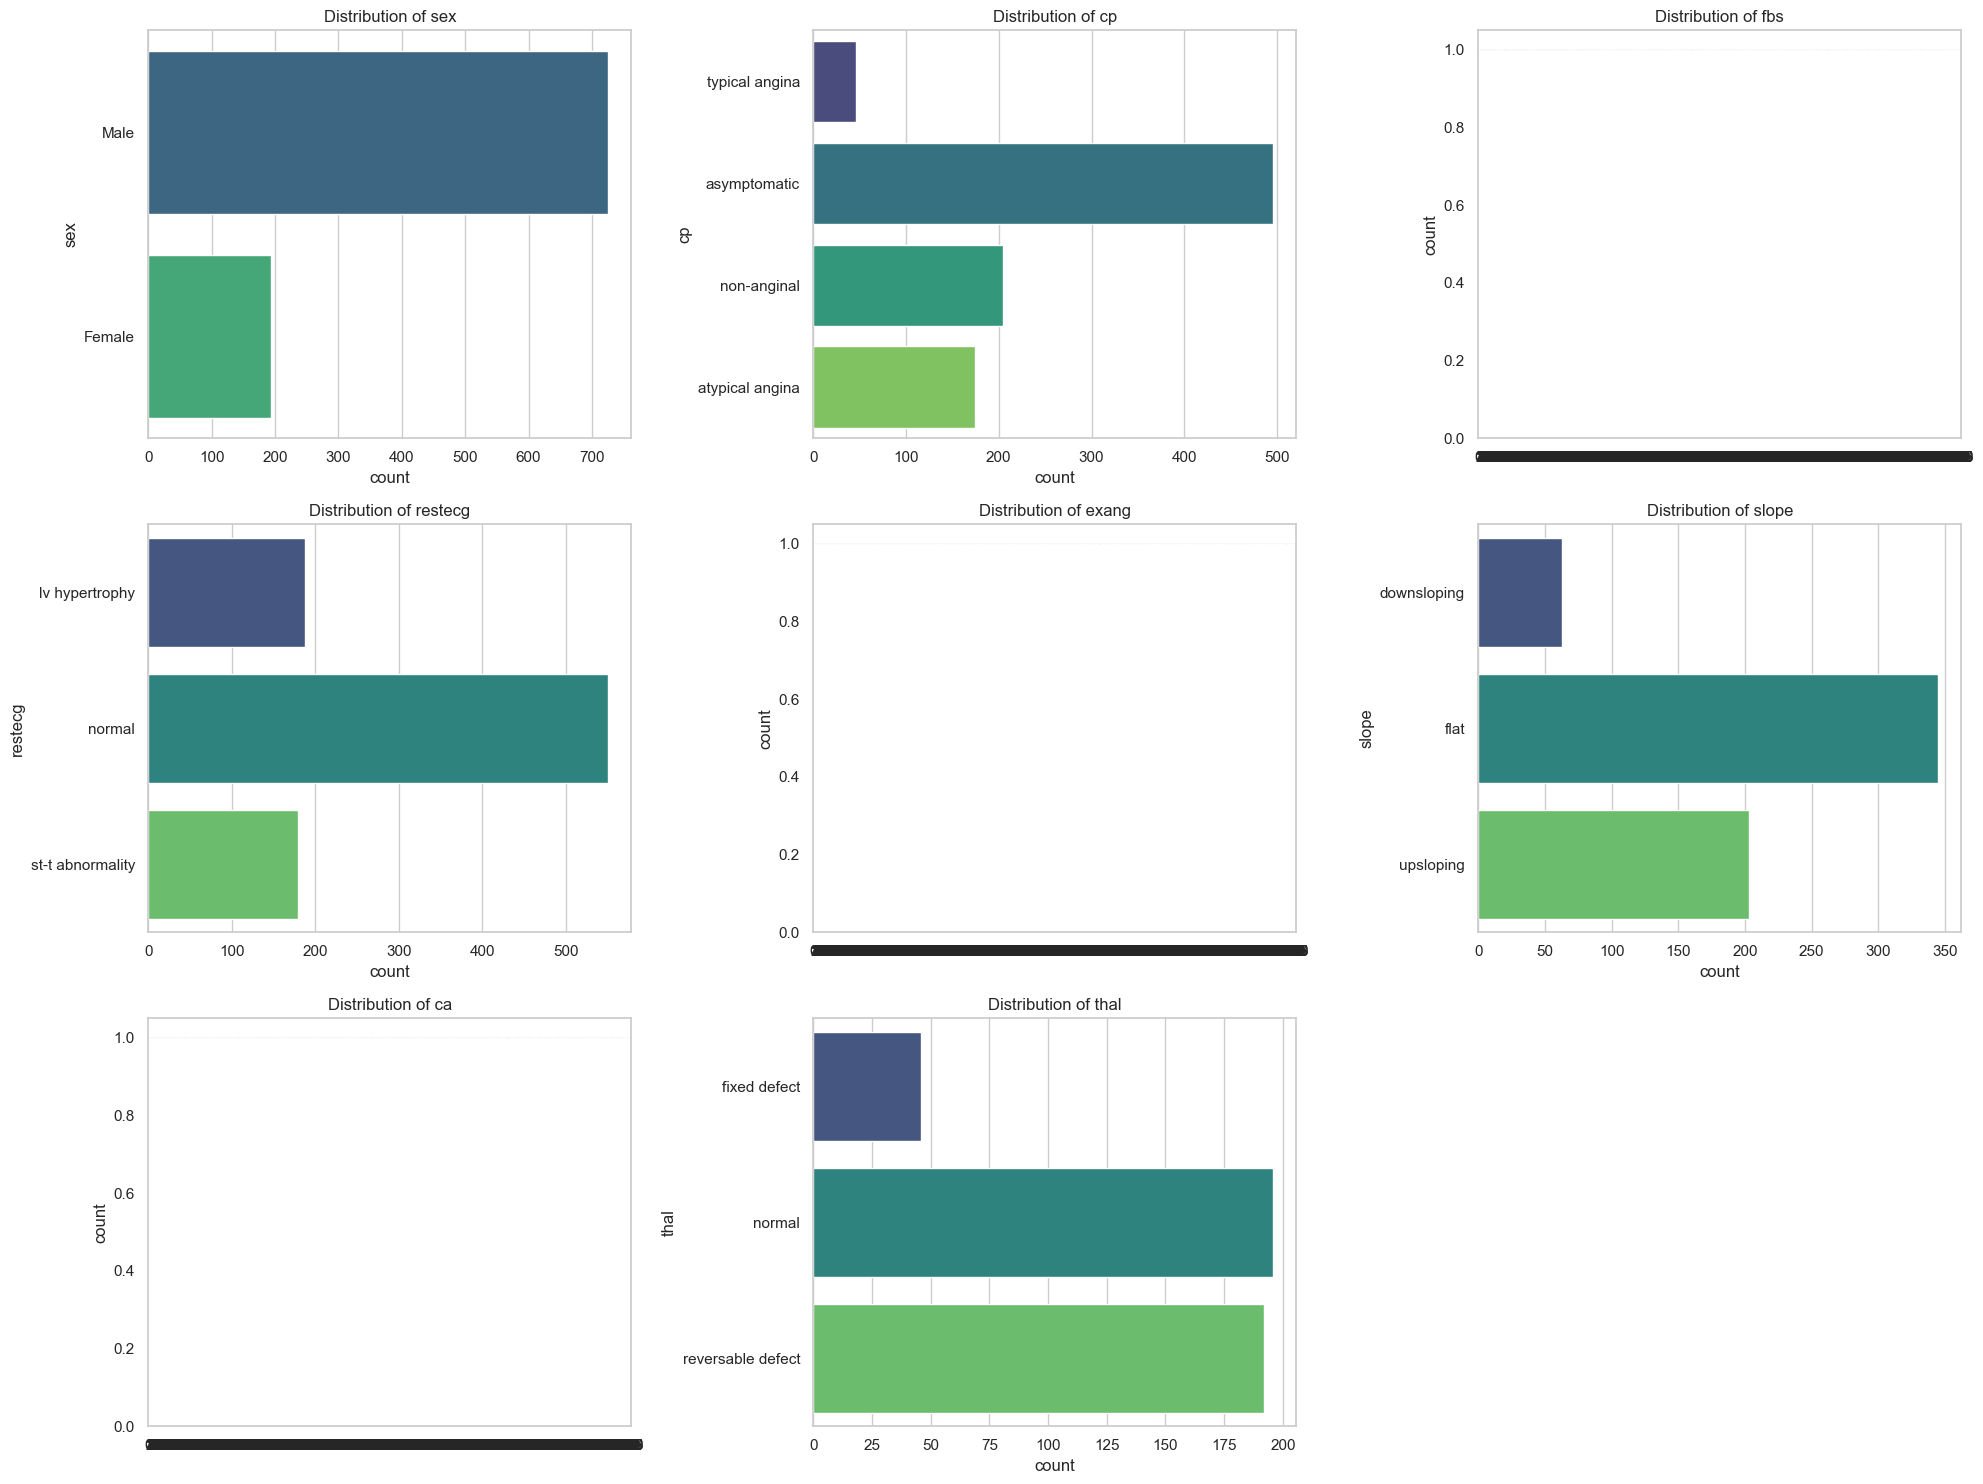

In [48]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['dataset'], palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Visualizing categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(df[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# numeric columns
print(f'numeric columns are: {numeric_cols}')

numeric columns are: ['trestbps', 'chol', 'thalch', 'oldpeak', 'age']


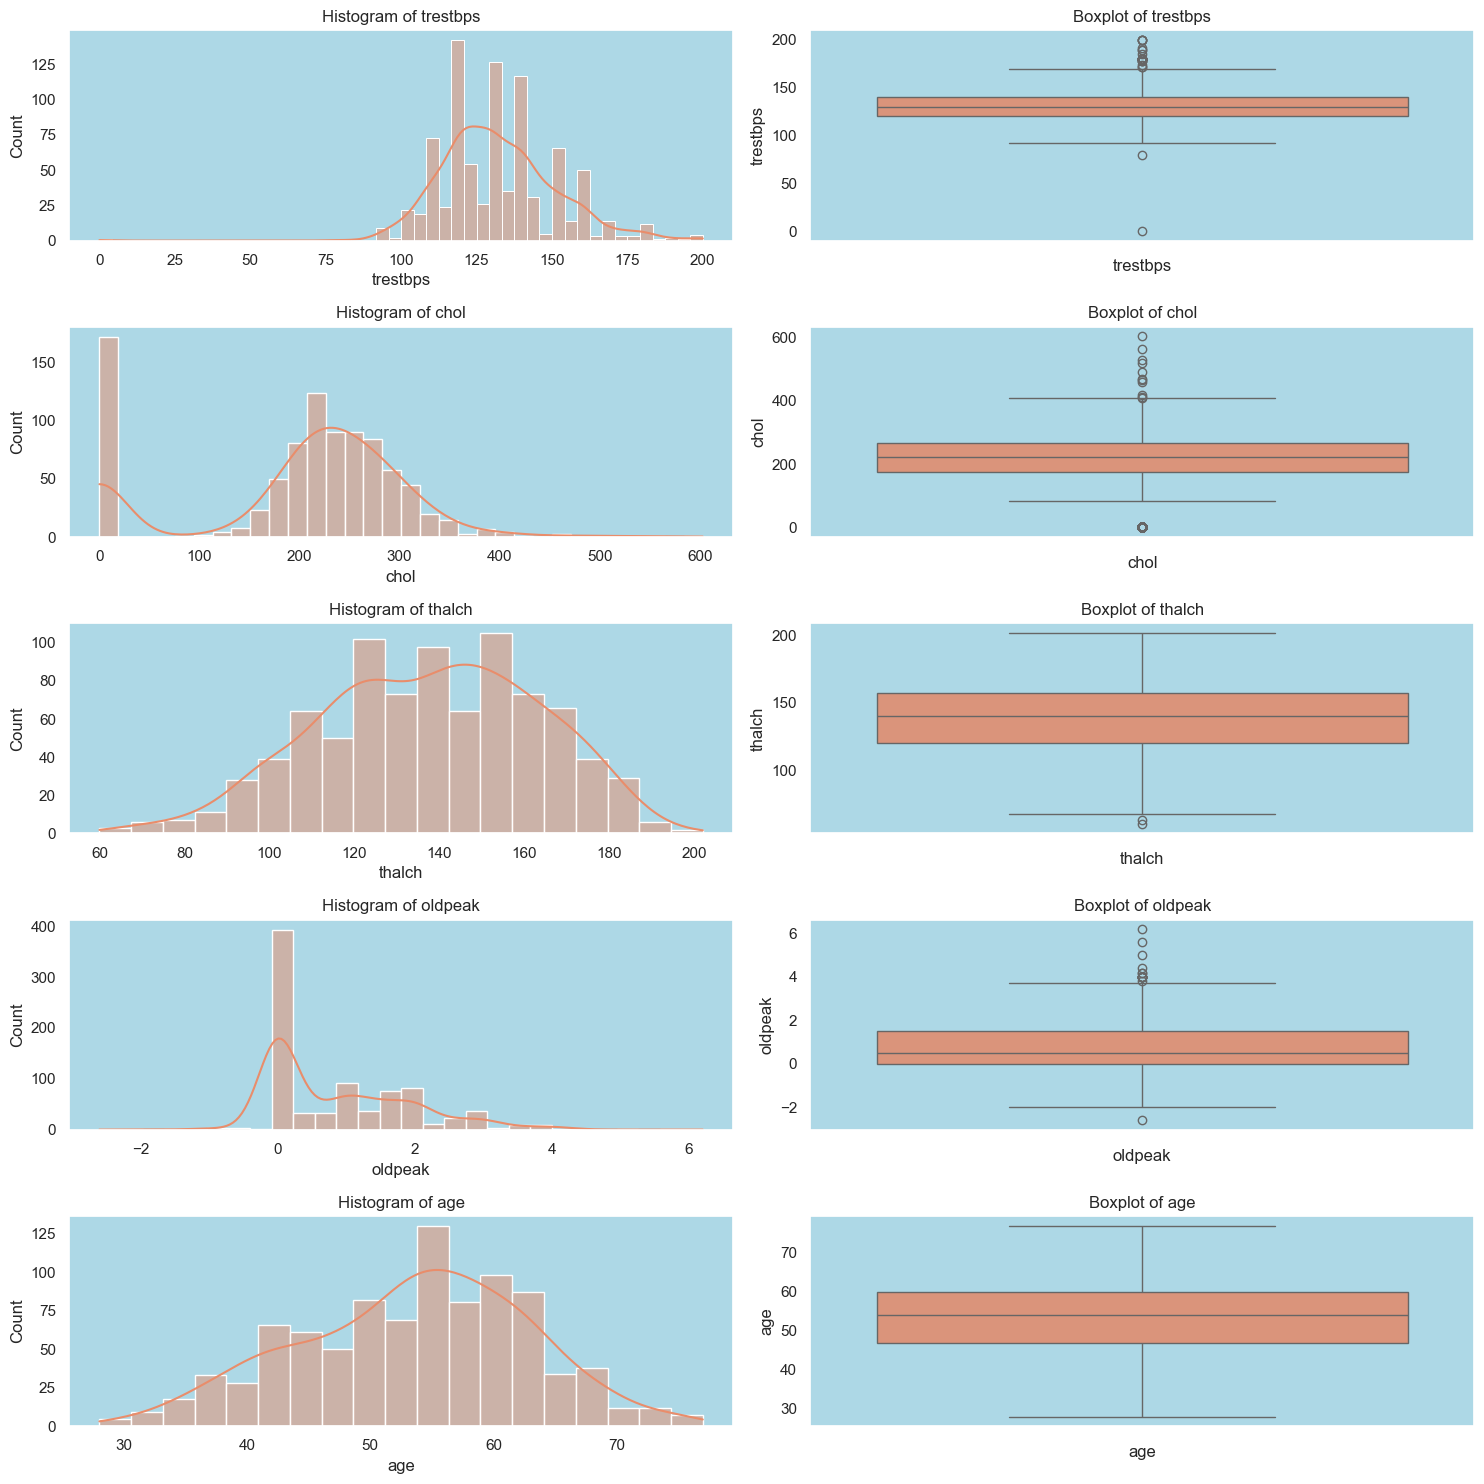

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size
plt.figure(figsize=(15, len(numeric_cols) * 3))

# Setting theme to dark mode
sns.set(style='dark', palette='flare') 

# Loop through each column and create a row with histogram and boxplot
for i, col in enumerate(numeric_cols):
    # Histogram to the left
    ax1 = plt.subplot(len(numeric_cols), 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    ax1.set_facecolor('lightblue')
    
    # Boxplot to the right
    ax2 = plt.subplot(len(numeric_cols), 2, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    ax2.set_facecolor('lightblue')

plt.tight_layout()
plt.show()

In [23]:
## Treating Outliers (z score)

In [24]:
# defining a function for outlier treatment using z-score
def outlier_treatment(df , col):

    # Calculate the Z-scores for each value in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define the threshold for identifying outliers
    threshold = 3

    # identify rows where any column has a Z-score above the threshold
    outliers = (z_scores > threshold)

    # the number of rows identified as outliers
    print(f'Number of rows identified as outliers in {col}: {outliers.sum()}')

    # Remove the outliers
    df = df[~outliers]

    # print statement
    print('Z score has been successfully applied on {}.'.format(col))
    
    # returning the dataframe
    return df

In [25]:
# aaplying outlier_treatment function on trestbps

df = outlier_treatment(df , 'trestbps')

Number of rows identified as outliers in trestbps: 8
Z score has been successfully applied on trestbps.


In [26]:
# aaplying outlier_treatment function on chol

df = outlier_treatment(df , 'chol')

Number of rows identified as outliers in chol: 2
Z score has been successfully applied on chol.


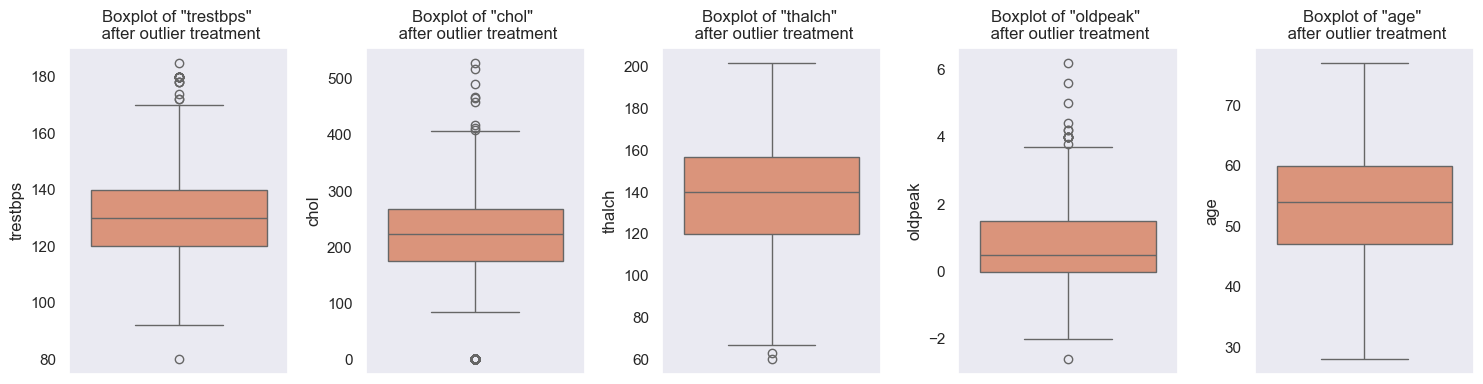

In [27]:
# plotting the boxplot of trestbps and chol

# setting up the figure size
plt.figure(figsize=(15, 4))

# loop through each column
for i in range(len(numeric_cols)):
    # create a subplot
    plt.subplot(1, len(numeric_cols), i + 1)
    # plotting the boxplot
    sns.boxplot(y=df[numeric_cols[i]])
    # adding title
    plt.title(f'Boxplot of "{numeric_cols[i]}" \n after outlier treatment')

plt.tight_layout()

plt.show()

In [28]:
print(f'The rows of our dataset after outlier treatment is: {df.shape[0]}')

The rows of our dataset after outlier treatment is: 910


In [29]:
# Scaling the data (Min Max Scaler) 

In [30]:
df.head() # preview the data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [31]:
# Applying Min Max Scaler

In [33]:
# selecting the column which needs to be scaled

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch', 'oldpeak']

# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# fitting the data to the scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [34]:
# Plotting the distribution of the scaled data

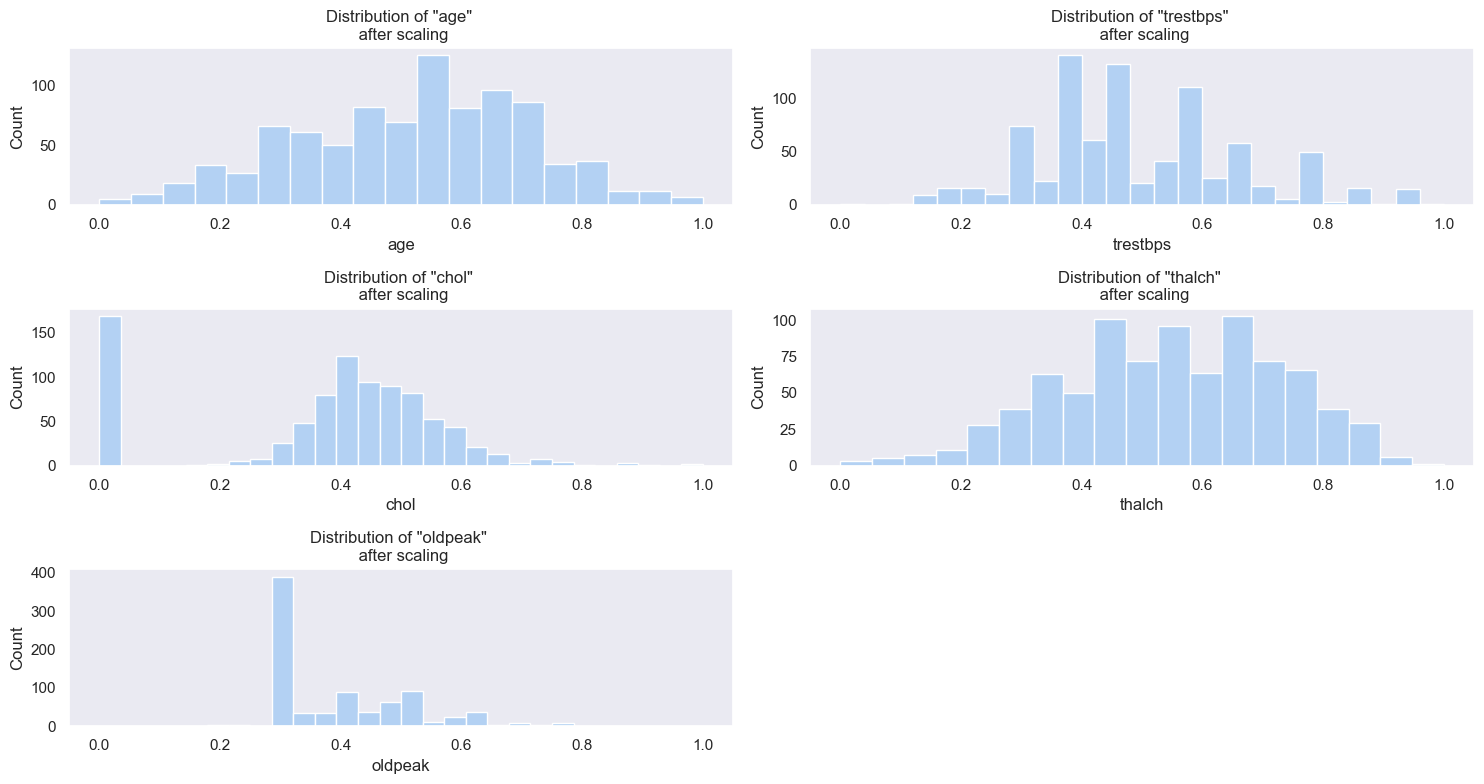

In [35]:
# plotting the distribution of the scaled data

# list of specific columns
cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch' , 'oldpeak']
# setting up the figure size
plt.figure(figsize=(15, 8))
# loop through each column
for i, col in enumerate(cols_to_scale):
    # create a subplot
    plt.subplot(3, 2,  i+1)
    # plotting the distribution
    sns.histplot(df[col], fill=True, color='#a1c9f4')
    # adding title
    plt.title(f'Distribution of "{col}" \n after scaling')

plt.tight_layout()
plt.show()

In [36]:
# Correlation (Numeric Columns)

In [37]:
numeric_col = ['age' , 'trestbps' , 'chol' , 'thalch', 'oldpeak']

# calculating the correlation
df[numeric_col].corr()

,age,trestbps,chol,thalch,oldpeak
age,1.000000,0.260668,-0.090082,-0.372546,0.257175
trestbps,0.260668,1.000000,0.096494,-0.102401,0.170488
chol,-0.090082,0.096494,1.000000,0.236319,0.043078
thalch,-0.372546,-0.102401,0.236319,1.000000,-0.156514
oldpeak,0.257175,0.170488,0.043078,-0.156514,1.000000


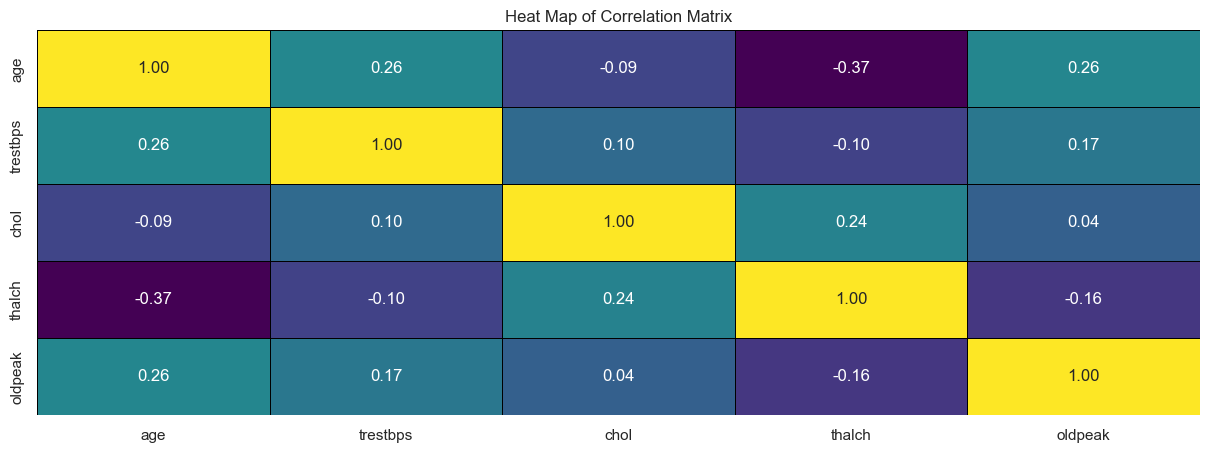

In [38]:
# plotting heatmap of correlation matrix

# setting up the figure size
plt.figure(figsize=(15, 5))
# plotting the heatmap
sns.heatmap(df[numeric_col].corr(), cbar=False , cmap='viridis' , annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')
# defining title
plt.title('Heat Map of Correlation Matrix')
plt.show()